In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
#from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xg

from sklearn.model_selection import cross_val_score

In [2]:
import os
os.chdir(r'C:\Users\Komal\Downloads\Datasets')

df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.shape

(2938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df.drop(['Year'],axis=1,inplace=True)

In [8]:
df=pd.get_dummies(df,columns=['Status'])

In [9]:
df=df.groupby('Country').mean()

In [10]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


In [11]:
df['Life expectancy '].fillna(df['Life expectancy '].median(),inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].median(),inplace=True)
df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].median(),inplace=True)
df[' BMI '].fillna(df[' BMI '].median(),inplace=True)
df['Polio'].fillna(df['Polio'].median(),inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].median(),inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].median(),inplace=True)
df['GDP'].fillna(df['GDP'].median(),inplace=True)
df['Population'].fillna(df['Population'].median(),inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(),inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].median(),inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].median(),inplace=True)
df['Schooling'].fillna(df['Schooling'].median(),inplace=True)

In [12]:
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developed', 'Status_Developing'],
      dtype='object')

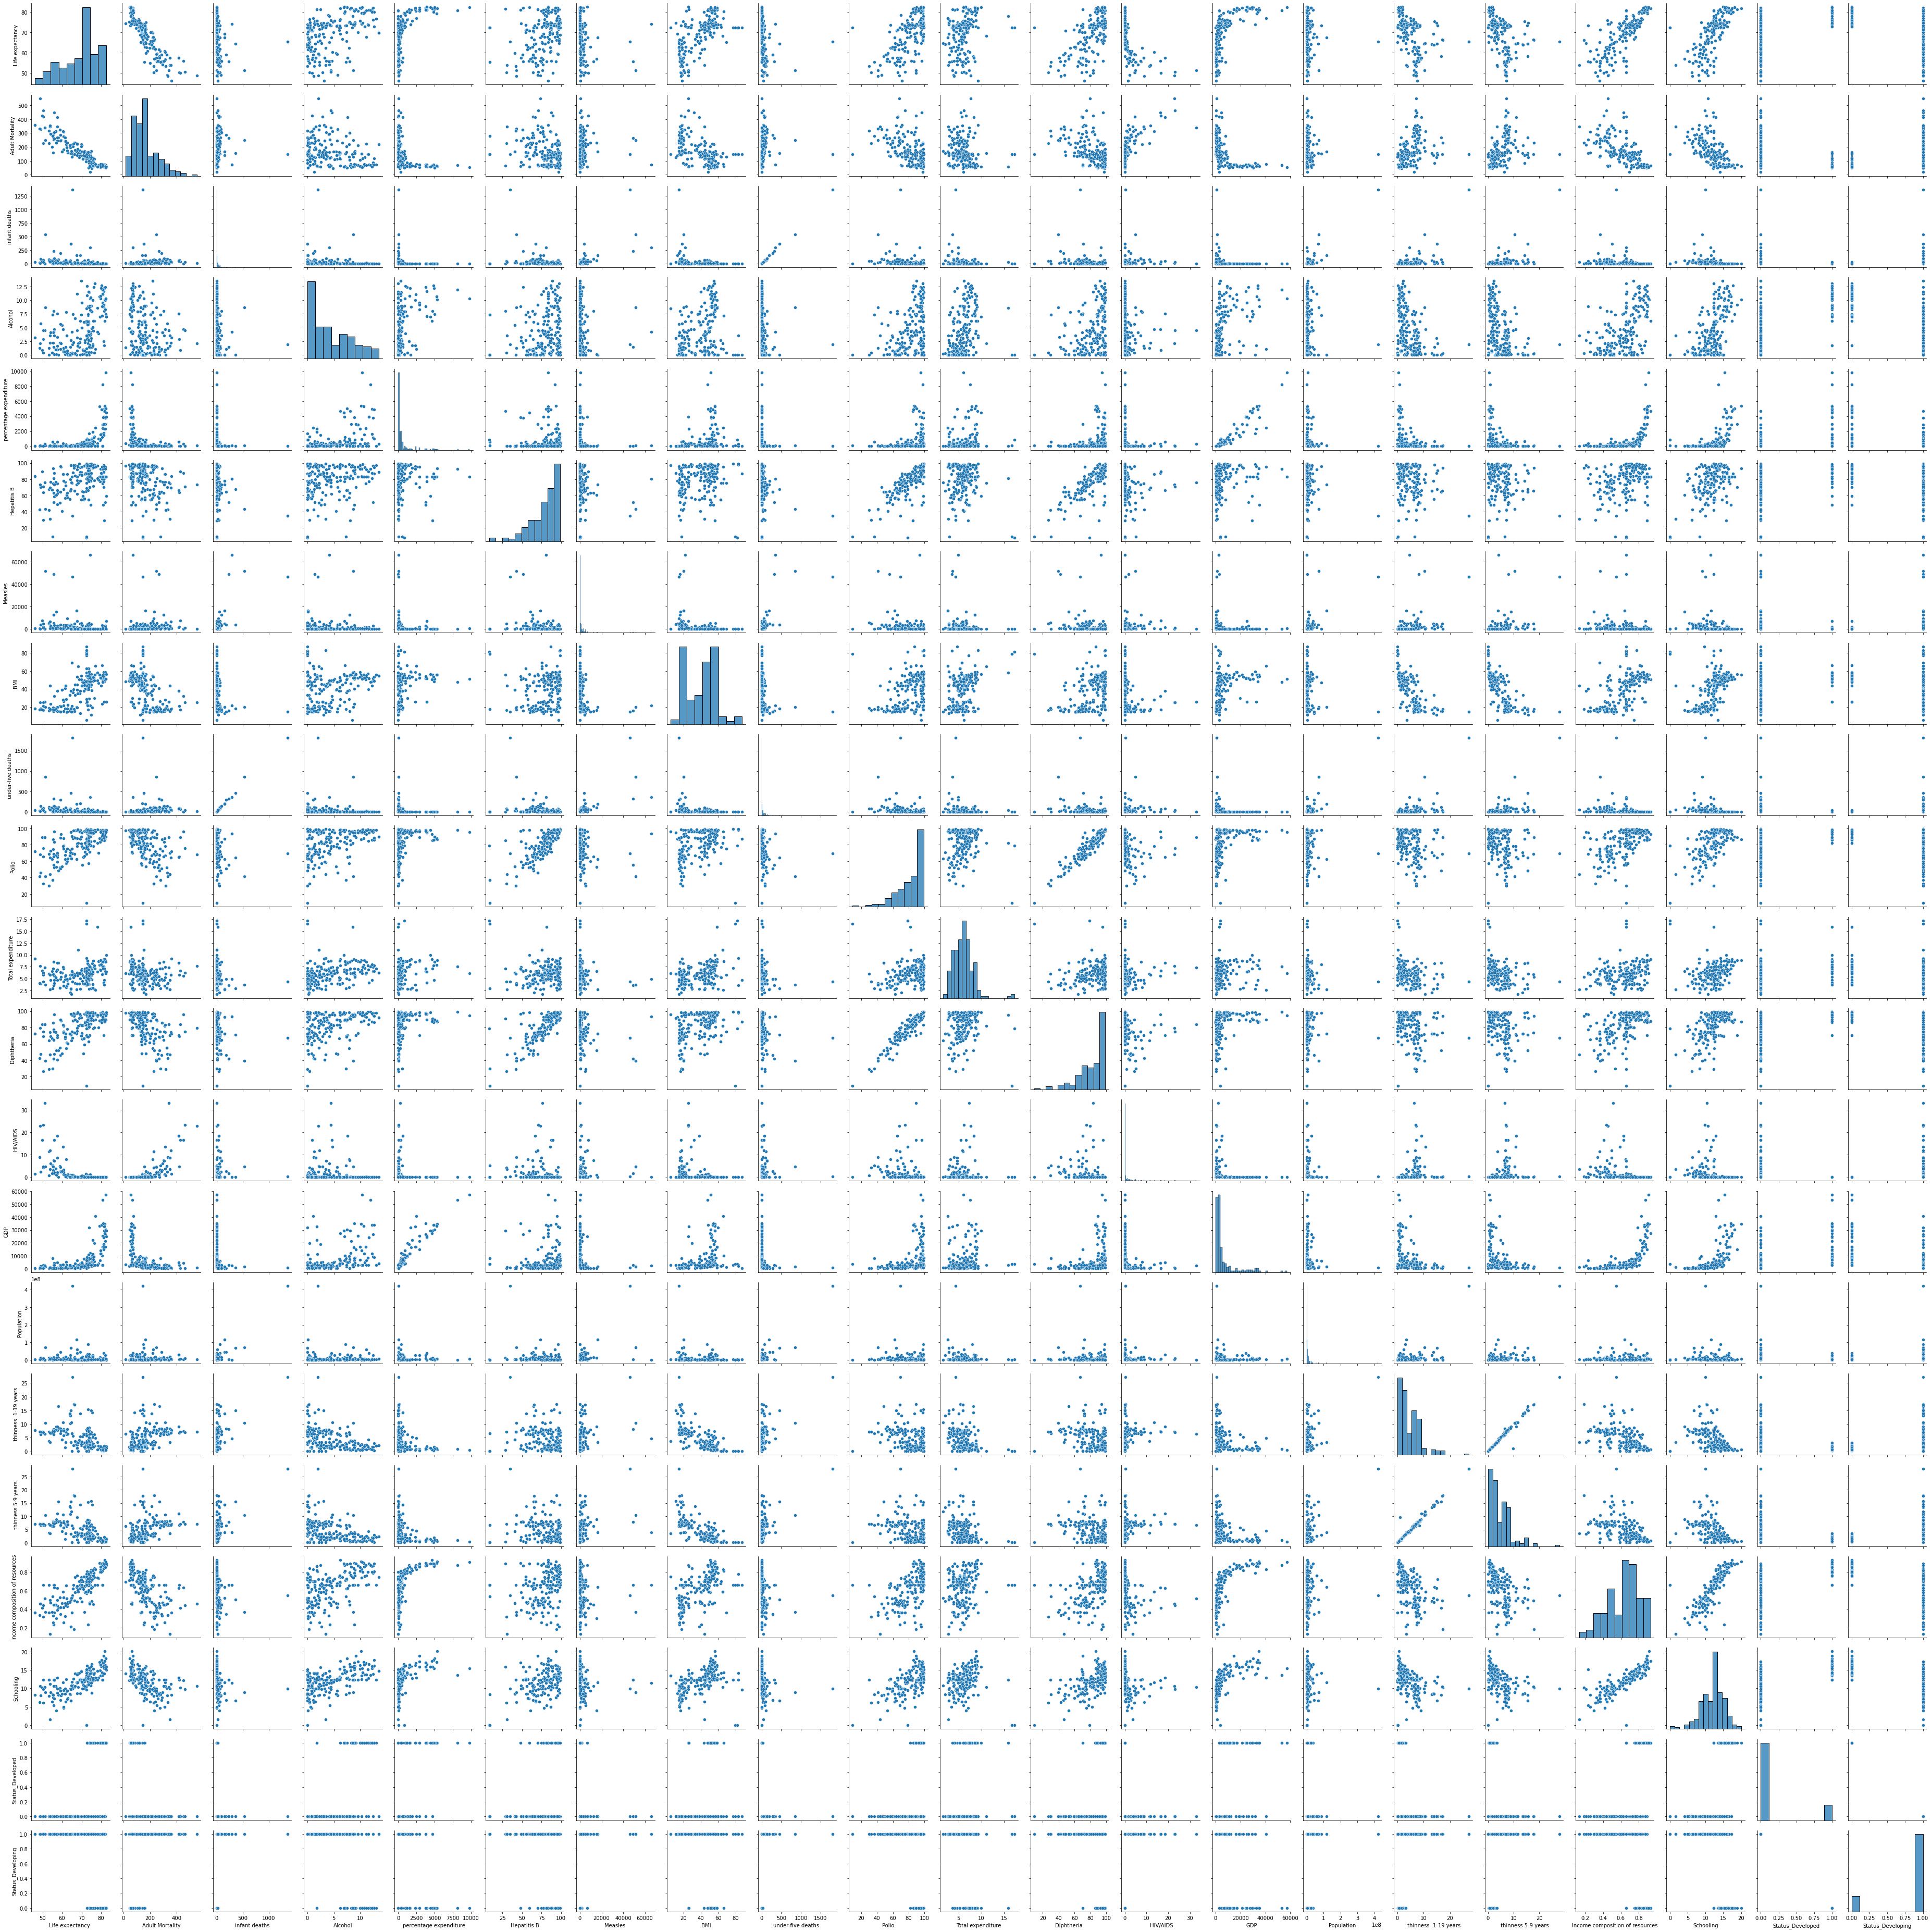

In [13]:
sns.pairplot(df)

<AxesSubplot:>

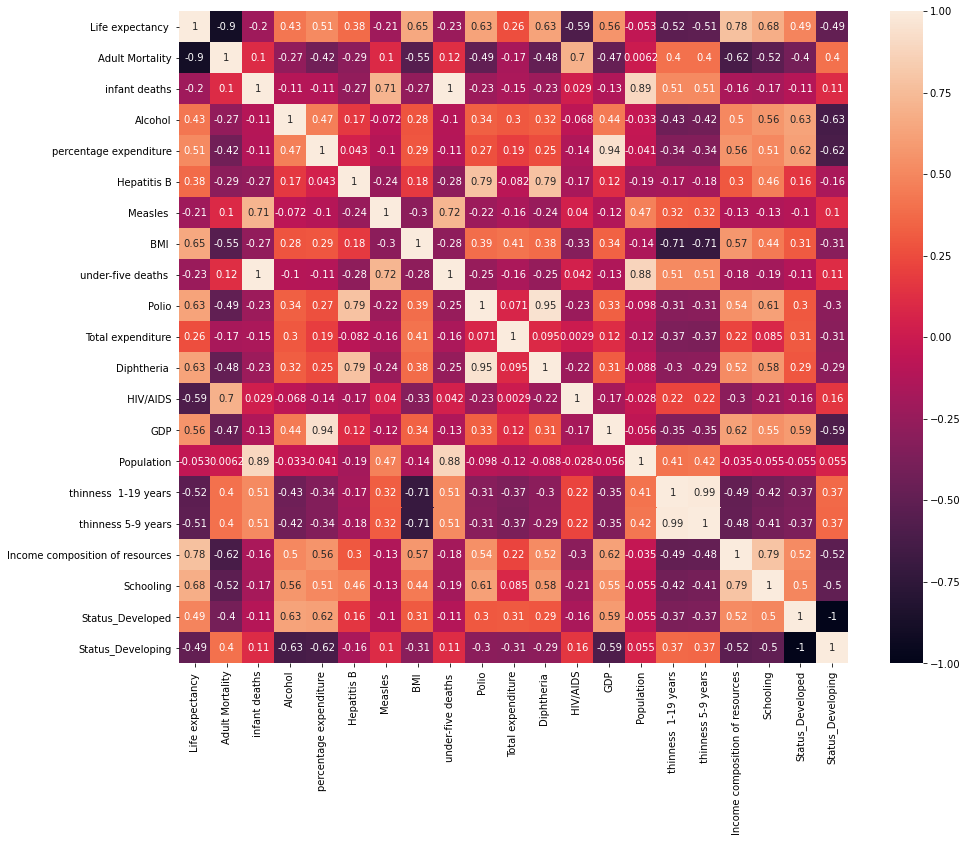

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

C:\Users\Komal\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

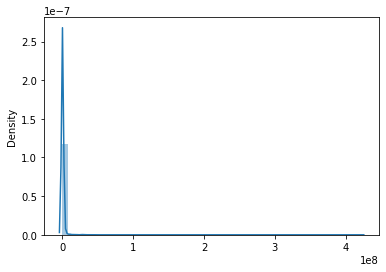

In [15]:
sns.distplot(df)  #rightly skewned

In [16]:
x=df.drop(['Life expectancy '],axis=1)
y=df['Life expectancy ']

In [17]:
sc=StandardScaler()
scaled_data=sc.fit_transform(x)

C:\Users\Komal\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

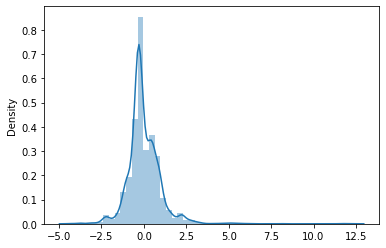

In [18]:
sns.distplot(scaled_data)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
lr.score(x_train,y_train)

0.9279428939377294

In [22]:
lr.score(x_test,y_test)

0.9161534231612009

In [23]:
y_pred=lr.predict(x_test)

In [24]:
lr.intercept_

63.2616178533073

In [25]:
r2_score(y_test,y_pred)

0.9161534231612009

In [26]:
a=cross_val_score(lr,x,y,cv=10)
print(a)
print(a.mean())

[0.89640543 0.94766693 0.8898226  0.88730102 0.90553791 0.9238111
 0.81521311 0.76700191 0.95898478 0.83366007]
0.8825404845837275


In [27]:
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error',mse)
rmse=np.sqrt(mse)
print('Root Mean Squared Error',rmse)

Mean Squared Error 6.849081187998206
Root Mean Squared Error 2.6170749297638016


In [28]:
y_pred

array([56.97268266, 76.78048205, 70.50193002, 59.51596909, 63.72425908,
       82.65811369, 68.27302984, 80.11792374, 67.81965373, 75.05919664,
       74.71455659, 76.46527093, 75.85475629, 80.05204385, 67.81909661,
       79.76793946, 64.01334213, 57.72974287, 81.18667036, 67.56034983,
       75.44399586, 69.88099605, 69.90644696, 74.768946  , 61.07748503,
       65.93707746, 60.26759798, 71.75381077, 69.95520314, 71.41363009,
       81.35543488, 81.50475471, 76.78985197, 78.96898518, 73.55589107,
       70.36256272, 63.66191306, 83.01176588, 60.37001177, 72.71731873,
       57.265933  , 77.73594628, 58.45454381, 82.39487857, 57.61798419,
       77.43984357, 50.45635024, 78.08291442, 49.06145054, 77.53697275,
       70.97379735, 58.5001731 , 64.59581241, 71.03056589, 76.63207039,
       69.34345044, 74.91839706, 60.94268678])

In [29]:
y_test

Country
Equatorial Guinea                                       55.31250
Costa Rica                                              78.59375
Seychelles                                              72.37500
Mozambique                                              53.39375
India                                                   65.41875
Netherlands                                             81.13125
Ukraine                                                 69.93750
Slovenia                                                79.73125
Tajikistan                                              66.65625
Bulgaria                                                72.85000
Bosnia and Herzegovina                                  75.96875
Brunei Darussalam                                       76.48750
The former Yugoslav republic of Macedonia               74.11250
Austria                                                 81.48125
Bangladesh                                              69.30000
Tunisia          

# Polinomial Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly=PolynomialFeatures(degree=2)
poly.fit(x_train)
x_train_p=poly.transform(x_train)
x_test_p=poly.transform(x_test)

In [33]:
lr=LinearRegression()
lr.fit(x_train_p,y_train)

LinearRegression()

In [34]:
lr.score(x_train_p,y_train)

0.999077174289148

In [35]:
lr.score(x_test_p,y_test)

-3825.560909288757

In [30]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

NameError: name 'LassoCV' is not defined

In [ ]:
alpha = lasscv.alpha_
alpha

In [ ]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

In [ ]:
lasso_reg.score(x_test, y_test)

In [ ]:
# Using Ridge regression model
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

In [ ]:
ridgecv.alpha_

In [ ]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

In [ ]:
ridge_model.score(x_test, y_test)

Decision Tree

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

In [ ]:
dt.score(x_train,y_train)

In [ ]:
dt.score(x_test,y_test)

In [ ]:
#a=cross_val_score(dt,x,y,cv=10)
#print(a)
#print(a.mean())

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

In [ ]:
rf.score(x_train,y_train)

In [ ]:
rf.score(x_test,y_test)

In [ ]:
#a=cross_val_score(rf,x,y,cv=10)
#print(a)
#print(a.mean())

Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)

In [ ]:
ad.score(x_train,y_train)

In [ ]:
ad.score(x_test,y_test)

XGBoost

In [ ]:
xgb=xg.XGBRegressor(objective='reg:linear',n_estimators=10,seed=0)
xgb.fit(x_train,y_train)

In [ ]:
xgb.score(x_train,y_train)

In [ ]:
xgb.score(x_test,y_test)